# Naive Bayes algorithm

Naive Bayes classifier is the fast, accurate and reliable algorithm on large datasets.

Naive Bayes methods are a combination of supervised learning algorithms based on applying Bayes theorem with a strong **assumption** that all the predictors are independent to each other i.e. the presence of a feature does not affect the presence of any other feature in the same class. 

Bayes theorem gives the following relationship in order to find the posterior probability of class i.e. the probability of a hypothesis and some observed Evidences, P(H⏐E).

P(H⏐E)=(P⟮H⟯P(E⏐H))/P(E)

Here, P(H⏐E) is the posterior probability of class.i.e. probability of hypothesis on the observed events.

P(H) is the prior probability of class. Probability of pypothesis before observing evidence.

P(E⏐H) is the likelihood which is the probability of evidence given that probability of hypothesis is true.

P(E) is the prior probability of predictor. It is the probability of evidence in total records.

The Scikit-learn provides four Bayes classifiers models namely Gaussian, Multinomial, Complement and Bernoulli. All of them differ mainly by the assumption they make regarding the distribution of P(H|E) i.e. the probability of predictor given class.

1	Gaussian Naive Bayes
Gaussian Naive Bayes classifier assumes that the data from each label is drawn from a simple Gaussian distribution.Gaussian distribution is in bell shaped curve.

2	Multinomial Naive Bayes
It assumes that the features are drawn from a simple Multinomial distribution. Multinomial distribution having multiclass categorical data.

3	Bernoulli Naive Bayes
The assumption in this model is that the features binary (0s and 1s) in nature. An usecase of Bernoulli Naive Bayes classification is Text classification with ‘bag of words’ model.

4	Complement Naive Bayes
It was designed to correct the severe assumptions made by Multinomial Bayes classifier. This kind of NB classifier is suitable for imbalanced data sets.

##### Import required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

##### Create DataFrame by reading csv file

In [2]:
df = pd.read_csv('PimaIndiansDiabetes.csv')

##### Check first two records

In [3]:
df.head(2)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


##### Seperate out features and target from DataFrame

In [4]:
# Get dataFrame of features and check first two records

X = df.drop(columns='Class')
X[:2]

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


##### Get count of records and features in input 

In [5]:
X.shape

(768, 8)

In [6]:
# Get target and check first two records

y = df.Class
y[:2]

0    1
1    0
Name: Class, dtype: int64

##### Check for missing data in features 

In [7]:
X.isna().sum()

TimesPregnant           0
GlucoseConcentration    0
BloodPrs                0
SkinThickness           0
Serum                   0
BMI                     0
DiabetesFunct           0
Age                     0
dtype: int64

##### Check for classes in target

In [8]:
y.unique()

array([1, 0], dtype=int64)

##### Get count of classes in target

In [9]:
y.nunique()

2

##### Get names of columns in feature

In [10]:
X.columns

Index(['TimesPregnant', 'GlucoseConcentration', 'BloodPrs', 'SkinThickness',
       'Serum', 'BMI', 'DiabetesFunct', 'Age'],
      dtype='object')

##### Analyse each column from feature to identify outlayers
For outlayer identification drow box plot for each column

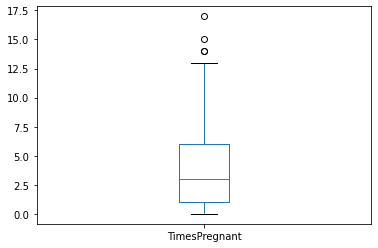

In [11]:
# Check for outlayers in TimesPregnant column

df.TimesPregnant.plot(kind = 'box')
plt.show()

In [12]:
df.TimesPregnant = df[df.TimesPregnant<13.5]

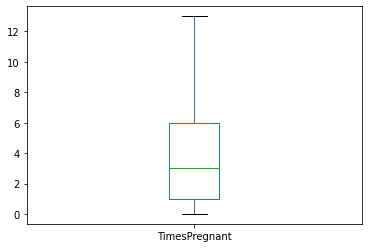

In [13]:
df.TimesPregnant.plot(kind = 'box')
plt.show()

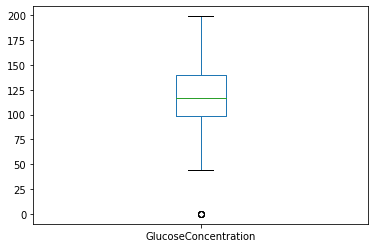

In [14]:
# Check for outlayers in GlucoseConcentration column

df.GlucoseConcentration.plot(kind = 'box')
plt.show()

In [15]:
df.GlucoseConcentration = df[df.GlucoseConcentration>40]

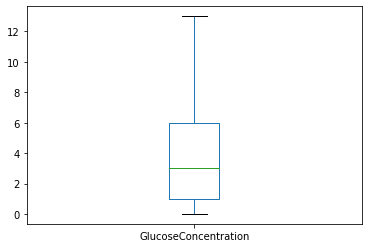

In [16]:
df.GlucoseConcentration.plot(kind = 'box')
plt.show()

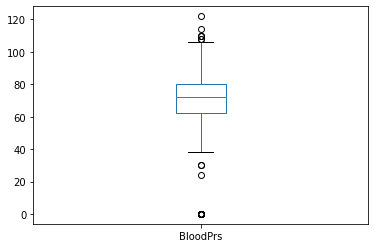

In [17]:
# Check for outlayers in Bloodprs column

df.BloodPrs.plot(kind = 'box')
plt.show()

In [18]:
df = df.query('BloodPrs>38 & BloodPrs<102')

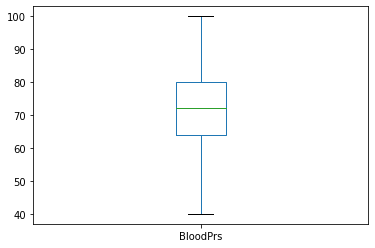

In [19]:
df.BloodPrs.plot(kind = 'box')
plt.show()

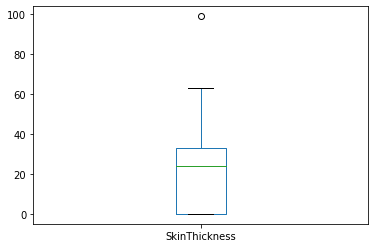

In [20]:
# Check for outlayers in SkinThickness column

df.SkinThickness.plot(kind = 'box')
plt.show()

In [21]:
df.SkinThickness = df[df.SkinThickness<65]

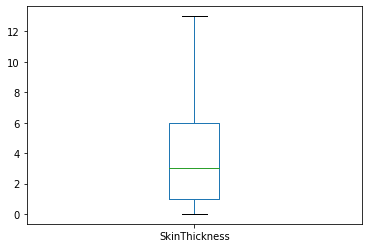

In [22]:
df.SkinThickness.plot(kind = 'box')
plt.show()

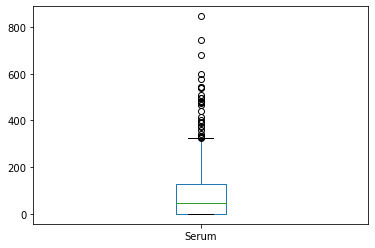

In [23]:
# Check for outlayers in Serum column

df.Serum.plot(kind = 'box')
plt.show()

In [24]:
df.Serum = df[df.Serum<370]

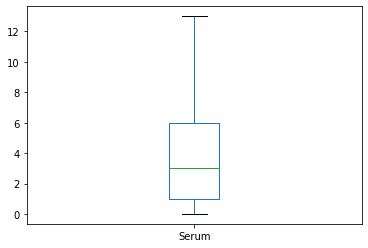

In [25]:
df.Serum.plot(kind = 'box')
plt.show()

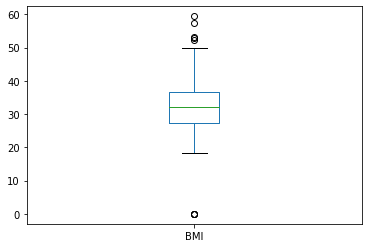

In [26]:
# Check for outlayers in BMI column

df.BMI.plot(kind = 'box')
plt.show()

In [27]:
df = df.query('BMI>17 & BMI <48')

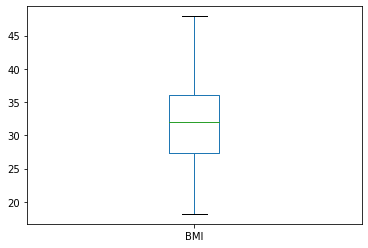

In [28]:
df.BMI.plot(kind = 'box')
plt.show()

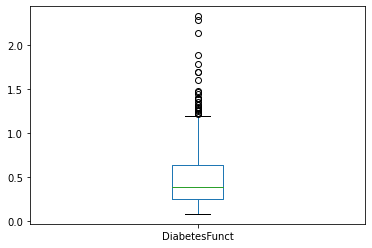

In [29]:
# Check for outlayers in DiabetesFunct column

df.DiabetesFunct.plot(kind = 'box')
plt.show()

In [30]:
df.DiabetesFunct = df[df.DiabetesFunct<1.2]

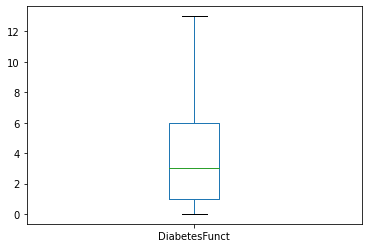

In [31]:
df.DiabetesFunct.plot(kind = 'box')
plt.show()

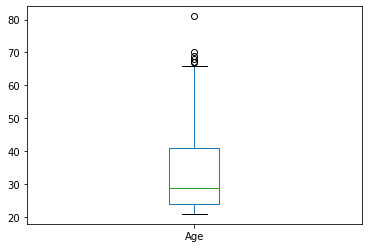

In [32]:
# Check for outlayers in DiabetesFunct column

df.Age.plot(kind = 'box')
plt.show()

In [33]:
df.Age = df[df.Age<66]

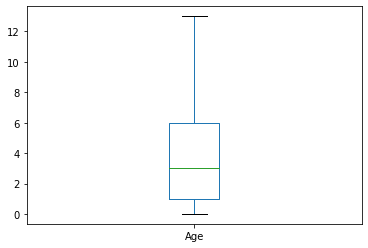

In [34]:
df.Age.plot(kind = 'box')
plt.show()

##### Get number of records in input

In [35]:
df.shape[0]

702

##### Check for missing values

In [36]:
df.isna().sum()

TimesPregnant            4
GlucoseConcentration     9
BloodPrs                 0
SkinThickness            5
Serum                   27
BMI                      0
DiabetesFunct           31
Age                     15
Class                    0
dtype: int64

In [37]:
# Create object of Simple imputer class

imputer = SimpleImputer(strategy='most_frequent')

In [38]:
# Fit imputer object to the independent variables x.

imputer.fit(df)

SimpleImputer(strategy='most_frequent')

In [39]:
# Get count of features on which imputer is applyed

imputer.n_features_in_

9

In [40]:
# Replace missing data with the calculated mean value 

imputer.transform(df)

array([[ 6.,  6., 72., ...,  6.,  6.,  1.],
       [ 1.,  1., 66., ...,  1.,  1.,  0.],
       [ 8.,  8., 64., ...,  8.,  8.,  1.],
       ...,
       [ 5.,  5., 72., ...,  5.,  5.,  0.],
       [ 1.,  1., 60., ...,  1.,  1.,  1.],
       [ 1.,  1., 70., ...,  1.,  1.,  0.]])

In [41]:
# Make changes inplace

df =pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [42]:
# Now check for the missing data

df.isna().sum()

TimesPregnant           0
GlucoseConcentration    0
BloodPrs                0
SkinThickness           0
Serum                   0
BMI                     0
DiabetesFunct           0
Age                     0
Class                   0
dtype: int64

##### Split the dataset into input and output

In [43]:
# Get features and see first two records

X = df.drop(columns = 'Class')
X.head(2)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age
0,6.0,6.0,72.0,6.0,6.0,33.6,6.0,6.0
1,1.0,1.0,66.0,1.0,1.0,26.6,1.0,1.0


In [44]:
# Get target and see first two records

y = df.Class
y[:2]

0    1.0
1    0.0
Name: Class, dtype: float64

##### Split the dataset into training and testing

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.80)

In [46]:
X_train[:1]

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age
199,5.0,5.0,66.0,5.0,5.0,37.8,5.0,5.0


In [47]:
y_train[:10]

199    1.0
688    1.0
282    1.0
638    1.0
238    0.0
89     1.0
74     0.0
549    0.0
621    0.0
660    0.0
Name: Class, dtype: float64

In [48]:
y_test[:10]

221    1.0
686    0.0
407    0.0
525    0.0
608    0.0
209    1.0
286    0.0
555    0.0
296    1.0
285    1.0
Name: Class, dtype: float64

##### Apply Naive bayes on DataFrame 

In [49]:
# As there are two classes in the target use Berouli

model = BernoulliNB()

In [50]:
# Check model

model

BernoulliNB()

In [51]:
# Train the model

model.fit(X_train,y_train)

BernoulliNB()

In [52]:
# Check classes of target 

model.classes_

array([0., 1.])

##### Testing/Prediction

In [53]:
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

##### Check score

In [54]:
model.score(X_train,y_train)*100

67.14285714285714

In [55]:
model.score(X_test,y_test)*100

66.54804270462633

##### Check hist plot of each column

<Figure size 3600x3960 with 0 Axes>

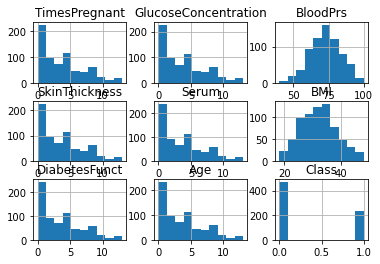

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize = (50,55))
df.hist()
plt.show()
plt.tight_layout()

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
g = GaussianNB()

In [59]:
g.fit(X_train,y_train)

GaussianNB()

In [60]:
g.score(X_train,y_train)*100

71.42857142857143

In [61]:
g.score(X_test,y_test)*100

64.41281138790036

##### Apply performace martrics for computation of cost function

In [62]:
y_pred = g.predict(X_test)

In [63]:
confusion_matrix(y_test,y_pred)

array([[276,  98],
       [102,  86]], dtype=int64)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73       374
         1.0       0.47      0.46      0.46       188

    accuracy                           0.64       562
   macro avg       0.60      0.60      0.60       562
weighted avg       0.64      0.64      0.64       562



In [65]:
accuracy_score(y_test,y_pred) * 100

64.41281138790036

##### Check for logstic regression
As target having only two classes apply logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [68]:
lr.score(X_train,y_train)*100

70.0

In [69]:
lr.score(X_test,y_test)*100

67.25978647686833

Insights:
    - Logistic regression gives better accuracy for this data